In [109]:
import numpy as np 
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt

### Schrodinger equation in 1D 

* $-\frac{\hbar^2}{2m} \frac{d}{dx^2} \Psi(x) + v(x)\Psi(x) = E \Psi(x)$

* We can define the second order derivative in 1D line(finite difference method) as: 

$\hspace{1 cm} \frac{d^2}{dx^2} \Psi(x) \approx \frac{1}{{\Delta x}^2}(\Psi(x_{i+1})-2\Psi(x_i)+\Psi(x_{i-1}))$

* Also we can make problem dimensionless by defining: $x=x/L$ and also we can set $\hbar=1$, then the 1D equation becomes:

$\hspace{1cm} \frac{1}{2 \Delta x^2}(-\Psi(x_{i+1}) + 2\Psi(x_i) -\Psi(x_{i-1})) + mL^2 V(x_i)\Psi(x_i) = mL^2E\Psi(x_i)$


* At the boundary $(x=0$ and $x=L)$ we set $\Psi =0$, i.e. $\Psi(0) = \Psi(L)=0$

$\hspace{1cm} \Psi_0 = \Psi_N = 0$

* We can write the above eigenvalue value equation in matrix format as below:

$\hspace{1cm} \begin{bmatrix}
    \frac{1}{\Delta x^2} + mL^2V_1 & -\frac{1}{2\Delta x^2} &0 &0 . . . &0\\
    -\frac{1}{2\Delta x^2}&\frac{1}{\Delta x^2} + mL^2V_2 &-\frac{1}{2\Delta x^2} &0 . . . &0\\
    0 &-\frac{1}{2\Delta x^2}&\frac{1}{\Delta x^2} + mL^2V_3 &-\frac{1}{2\Delta x^2}  . . &0\\
    . &. &. &. &.\\
    . &. &. &. &\frac{1}{\Delta x^2} + mL^2V_{N-1}\\
    \end{bmatrix} \begin{bmatrix}
    \Psi_1\\
    \Psi_2\\
    \Psi_2\\
    .\\
    .\\
    \Psi_{N-1}
    \end{bmatrix} = mL^2E \begin{bmatrix}
    \Psi_1\\
    \Psi_2\\
    \Psi_2\\
    .\\
    .\\
    \Psi_{N-1}
    \end{bmatrix}
    $ 

In [110]:
N = 100
x = np.linspace(0,1,N+1)
dx = np.diff(x)[0]

In [112]:
# define the potential 
def mL2V(x):
    v = np.zeros_like(x)
    v[40:60]=-1000
    return v

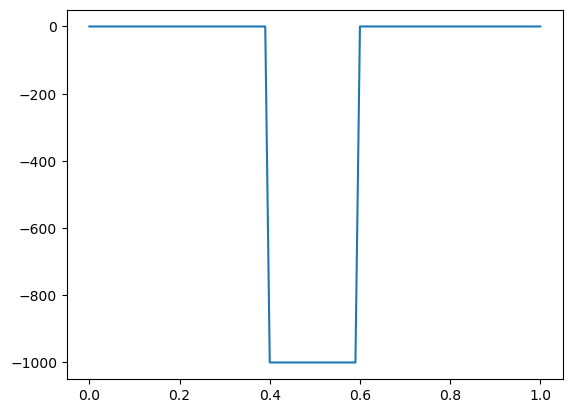

In [113]:
#plot the potential
plt.plot(x,mL2V(x))

In [114]:
# define the diagonal and off-digonal(one obove and one below) elements 

d = 1/dx**2 + mL2V(x)[1:-1]          # diagonal elements 
e = -1/(2*dx**2)*np.ones(N-2)        # off diagonal elements 


In [115]:
# solve for the eign-value problem 
w,v = eigh_tridiagonal(d,e)

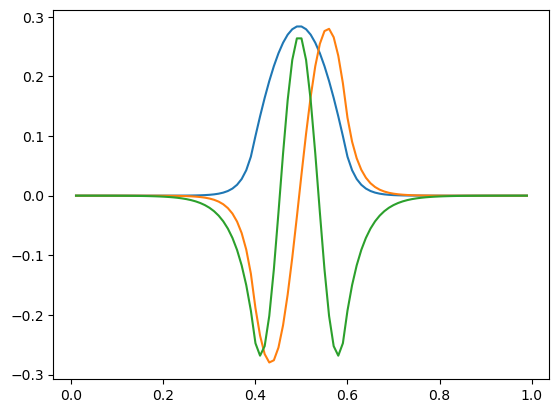

In [116]:
# plot the eign values 

plt.plot(x[1:-1],v.T[0])
plt.plot(x[1:-1],v.T[1])
plt.plot(x[1:-1],v.T[2])


<BarContainer object of 10 artists>

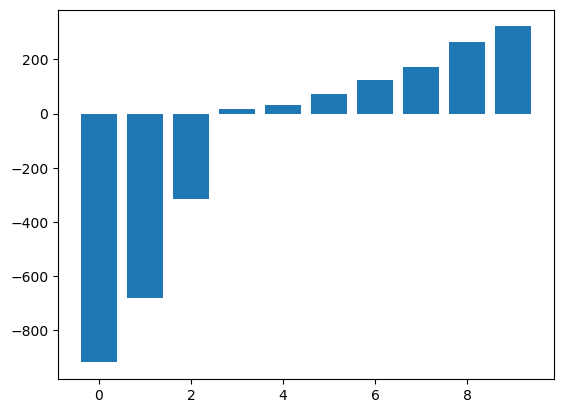

In [117]:
# plot the eign vectors 
plt.bar(np.arange(0,10,1),w[0:10])